Problem: Accuracy

In [1]:
# Import 
import matplotlib.pyplot as plt
from lab2_functions import euler, leapfrog, runge, midpoint
import numpy as np


In [2]:
# Definitions
theFuncs = {
    'euler': euler,
    'leapfrog': leapfrog,
    'runge': runge,
}


def eval_fun(fun_choice, arg_dict):
    """
    Parameters
    ----------
    fun_choice: str
       name of finite difference approx from lab2_functions
    arg_dict: dict
       dictionary of arguments for lab2_functions
    Returns
    -------
    approxTime, approxTemp: tuple
        tuple of ndarray float vectors with time and temperature
    """
    npts = arg_dict['npts']
    tend = arg_dict['tend']
    To = arg_dict['To']
    Ta = arg_dict['Ta']
    theLambda = arg_dict['theLambda']
    approxTime, approxTemp = theFuncs[fun_choice](npts, tend, To, Ta,
                                                  theLambda)
    return approxTime, approxTemp


Local error at first time step =  8.9765847661738e-06


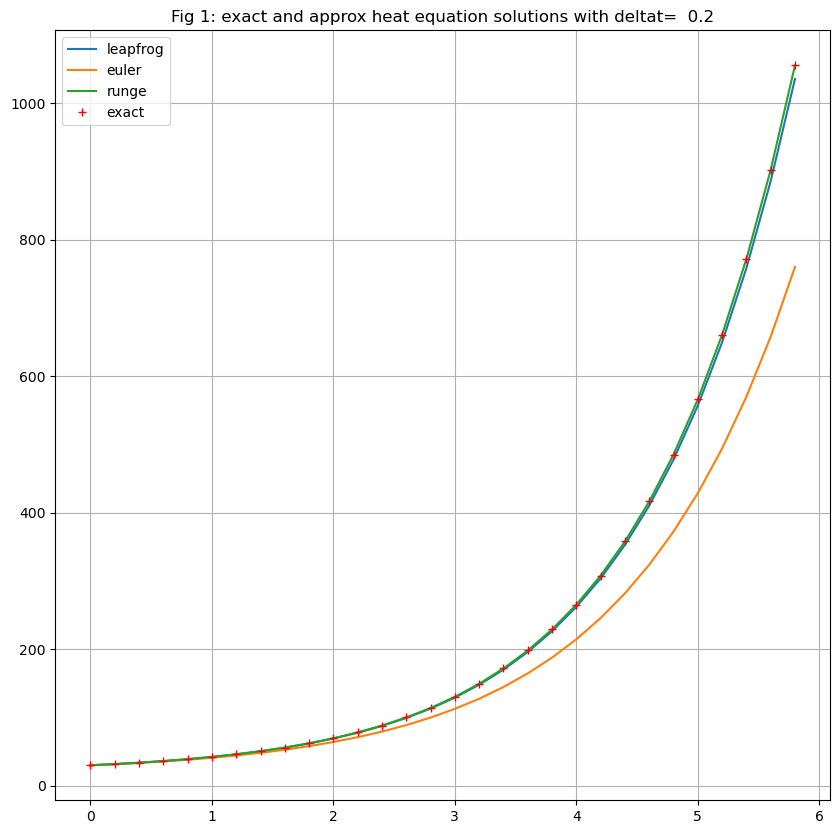

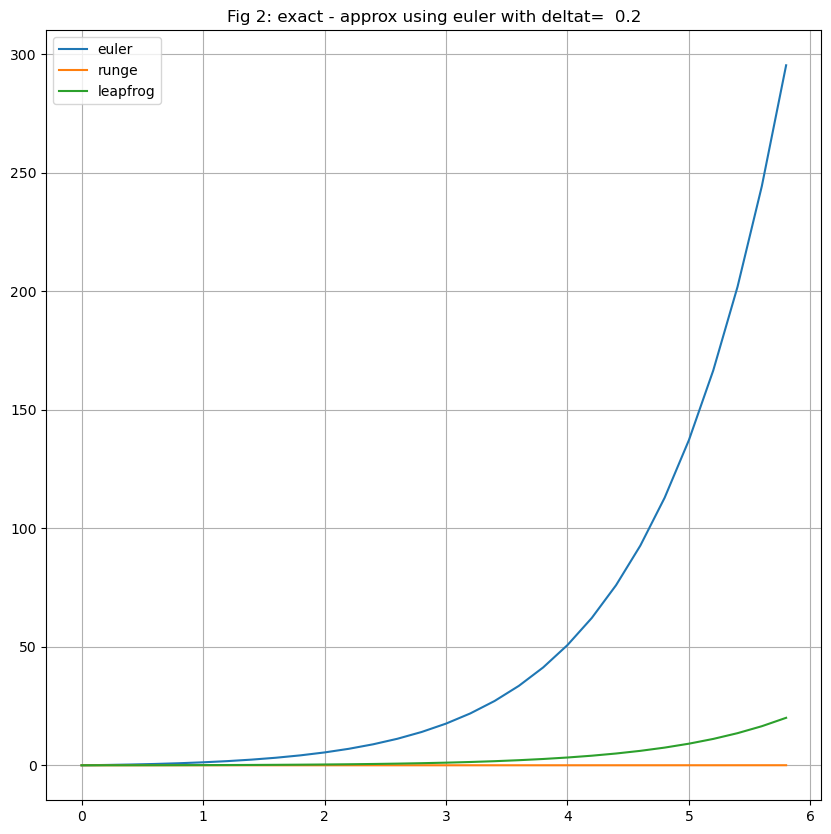

In [3]:
# %%
if __name__ == "__main__":

    Ta = 20
    To = 30
    # run for tend = 3,6,10
    tend = 6.0
    theLambda = 0.8
    npts = 30
    

    default_args = dict(Ta=Ta,
                        To=To,
                        tend=tend,
                        theLambda=theLambda,
                        npts=npts)
    #
    # start a plot to show all the functions
    #
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 10))
    plt.grid()
    keep_curves = dict()
    fun_list = ['leapfrog', 'euler', 'runge']
    #
    # add a curve for each function in fun_list
    #
    for fun_choice in fun_list:
        approxTime, approxTemp= eval_fun(fun_choice, default_args)
        ax1.plot(approxTime, approxTemp, label=fun_choice)
        keep_curves[fun_choice] = (approxTime,approxTemp)

   # for i in len(fun_list):
   #     approxTime, approxTemp = eval_fun(fun_list[i], default_args)
   #     ax1.plot(approxTime[i], approxTemp[i], label=fun_list[i])
   #     keep_curves[i] = (approxTime, approxTemp)
    #
    # now add the exact solution for comparison
    #
    exactTime = np.empty_like(approxTime)
    exactTemp = np.empty_like(exactTime)
    for i in range(npts):
        exactTime[i] = tend * i / npts
        exactTemp[i] = Ta + (To - Ta) * np.exp(theLambda * exactTime[i])
    ax1.plot(exactTime, exactTemp, 'r+', label='exact')
    deltat=tend / npts
    title = f"Fig 1: exact and approx heat equation solutions with deltat={deltat:5.2g}"
    ax1.set(title=title)
    ax1.legend(loc='best')
    #ax1.set_xlim(0,0.5)
    #ax1.set_ylim(30, 40)
    #
    # g.w.added code here
    #
    locError = exactTemp[1] - approxTemp[1] 
    print('Local error at first time step = ', locError)
    #
    # Make a second plot that shows the difference between exact and euler
    #

    #
    #g.w.
    #
    rkTime, rkTemp = eval_fun('runge', default_args)
    rkDiff = exactTemp - rkTemp
    lfTime, lfTemp = eval_fun('leapfrog', default_args)
    lfDiff = exactTemp - lfTemp
    #
    
    fig2, ax2 = plt.subplots(1, 1,figsize=(10,10))
    plt.grid()
    fun_choice = 'euler'
    approxTemp = keep_curves[fun_choice][1]
    difference = exactTemp - approxTemp
    ax2.plot(exactTime, difference, label='euler')
    ax2.plot(exactTime, rkDiff, label='runge')
    ax2.plot(exactTime, lfDiff, label='leapfrog')
    title = f"Fig 2: exact - approx using {fun_choice} with deltat={deltat:5.2g}"
    ax2.set(title=title)
    ax2.legend()
    plt.show()
    #
    # g.w. 
    #
    #fig3, ax3 = plt.subplots(1,1, figsize=(10,10))
    #plt.grid()
    #fun_choice = 'euler'
    #fit = np.polyfit(np.log(exactTime), np.log(difference), 1)
    #ax3.loglog(exactTime, difference)
    #ax3.plot(np.log(exactTime), np.log(difference))
    #ax3.loglog(np.log(exactTime), fit)


a) Increasing the order of the solution and decreasing the time step always improved the accuracy of the solution for the three methods and time steps I chose. This is shown on figure 2 above, where the difference calculation is highest for euler and lowest (0) for runge kutta.

b) Figure 2 is the global error of the different approximation methods and the exact. To calculate the local error, you have to calculate the difference between the approx. at time t and the exact at time t, when the exact function is initialized at time t-1 at the value of the approximation at t-1. On figure 1, the exact function is only initialized at t=0, so we can only only determine the local error at the first time step. 

c)

$$error = c*(\Delta t)^2$$
$$p = \frac{ln\frac{error_1}{error_2}}{ln\frac{\Delta t_1}{\Delta t_2}}$$

In [4]:
#midTime, midTemp = eval_fun('midpoint', default_args)
#midDiff = eacxtTemp - midTemp
rkTime, rkTemp = eval_fun('runge', default_args)
rkDiff = exactTemp - rkTemp
lfTime, lfTemp = eval_fun('leapfrog', default_args)
lfDiff = exactTemp - lfTemp
eulerP = (np.log(difference[1]/difference[2]))/(np.log(0.1/0.2))
#midP = (np.log(midDiff[1]/midDiff[2]))/(np.log(0.1/0.2))
rkP = (np.log(rkDiff[1]/rkDiff[2]))/(np.log(0.1/0.2))
lfP = (np.log(lfDiff[1]/lfDiff[2]))/(np.log(0.1/0.2))
print('p scheme for euler = ', eulerP)
#print('p scheme for midpoit =', midP)
print('p scheme for runge kutta =', rkP)
print('p scheme for leapfrog =', lfP)

p scheme for euler =  1.2225021883174556
p scheme for runge kutta = 1.2308306550365
p scheme for leapfrog = 1.3655742369100978


These aren't eaxctly what I expected. Euler has the lowest p value which would indicate the biggest error, which is consistent with whats shown on figure 1. However, the runge kutta method has almost the same p value but the plot indicates an error from the exact function that is significantly less than the euler method. And the plot shows the runge kutta method and the leapfrog method having very similar errors from the exact, but their p values are very different.

Problem: Backwards Euler 

In [5]:
# Import
import matplotlib.pyplot as plt
from lab2_functions import euler,beuler,leapfrog
import numpy as np

In [6]:
# Define
theFuncs={'euler':euler,'beuler':beuler,'leapfrog':leapfrog}


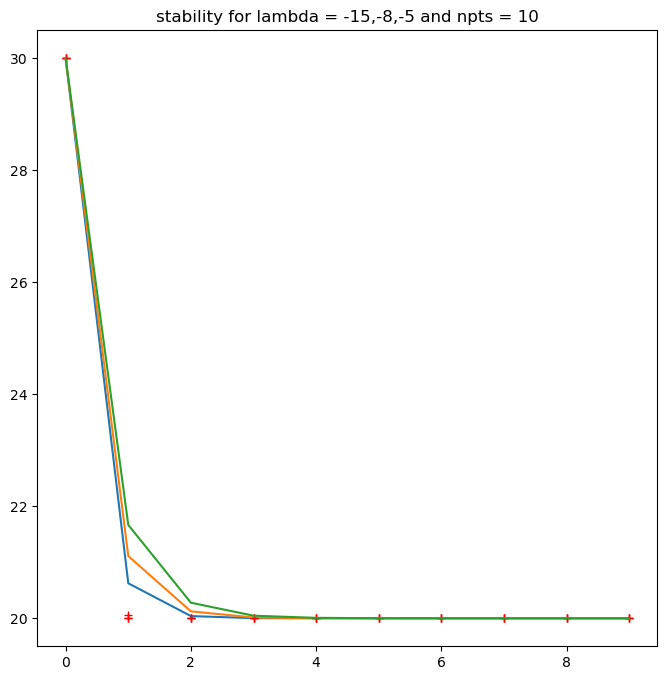

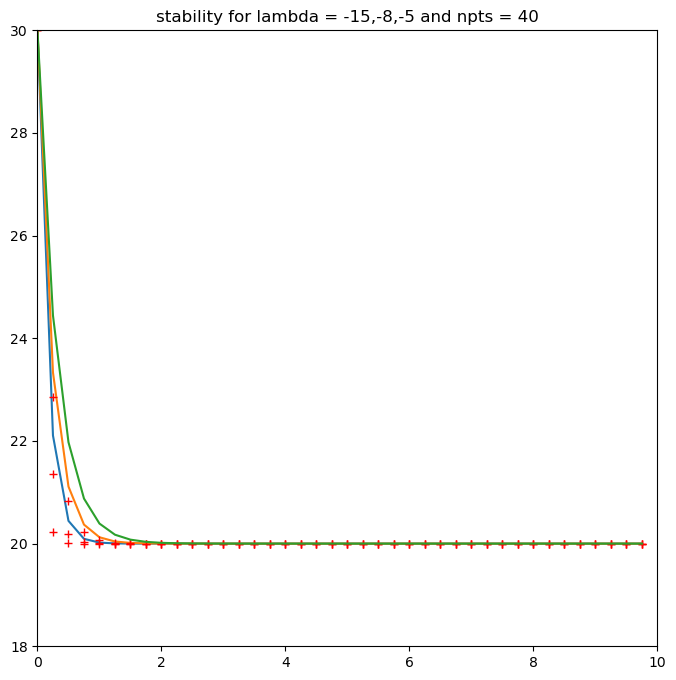

In [7]:
# Plot
if __name__=="__main__":
    tend=10.
    Ta=20.
    To=30.
    theLambda=[-15., -8., -5.]
    funChoice='beuler'
    npts=[10, 40]
    #approxTime,approxTemp=theFuncs[funChoice](npts,tend,To,Ta,theLambda)
    #exactTime=np.empty([npts,],float)
    #exactTemp=np.empty_like(exactTime)

    fig1, ax1 = plt.subplots(1,1,figsize=(8,8))
    fig2, ax2 = plt.subplots(1,1,figsize=(8,8))
    
    for k in range(len(npts)):
        NPTS = npts[k]
        exactTime=np.empty([NPTS,],float)
        exactTemp=np.empty_like(exactTime)
        for j in range(len(theLambda)):
            lmda = theLambda[j]
            approxTime, approxTemp=theFuncs[funChoice](NPTS,tend,To,Ta,lmda)
            for i in np.arange(0,NPTS):
                exactTime[i] = tend*i/NPTS
                exactTemp[i] = Ta + (To-Ta)*np.exp(lmda*exactTime[i])
            if k == 0:
                ax1.plot(exactTime, exactTemp,'r+')
                ax1.plot(approxTime, approxTemp)
                keep_curves[j]= (exactTime, exactTemp, approxTime, approxTemp)
            if k == 1:
                ax2.plot(exactTime, exactTemp, 'r+')
                ax2.plot(approxTime, approxTemp)
                keep_curves[j]=(exactTime, exactTemp, approxTime, approxTemp)
            
    theAx=plt.gca()
    theAx.set_xlim([0,10])
    theAx.set_ylim([18,30])
    ax1.set_title('stability for lambda = -15,-8,-5 and npts = 10')
    ax2.set_title('stability for lambda = -15,-8,-5 and npts = 40') 
    plt.show()


The plots above show that the backwards euler function stabilizes (with two different time steps) when lambda is negative